In [1]:
! pip install -q kaggle

In [4]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [5]:
!cp kaggle.json ~/.kaggle

In [6]:
!kaggle datasets download -d vjchoudhary7/customer-segmentation-tutorial-in-python

  0% 0.00/1.55k [00:00<?, ?B/s]
100% 1.55k/1.55k [00:00<00:00, 4.83MB/s]


In [7]:
!unzip /content/customer-segmentation-tutorial-in-python.zip

Archive:  /content/customer-segmentation-tutorial-in-python.zip
  inflating: Mall_Customers.csv      


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df = pd.read_csv('/content/Mall_Customers.csv');
df.head(20)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [10]:
df.shape

(200, 5)

In [11]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [16]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [17]:
df.columns.tolist()

['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

DATA PREPROCESSING

In [20]:
#UNIVARIATE
#PIE CHART
df['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

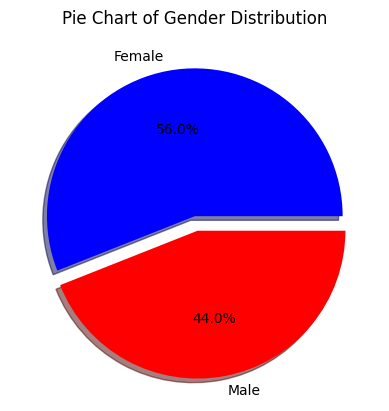

In [19]:
plt.pie(df['Gender'].value_counts(),[0,0.1],labels=['Female','Male'],autopct='%1.1f%%',shadow=True,colors=['blue','red'])
plt.title('Pie Chart of Gender Distribution')
plt.show()

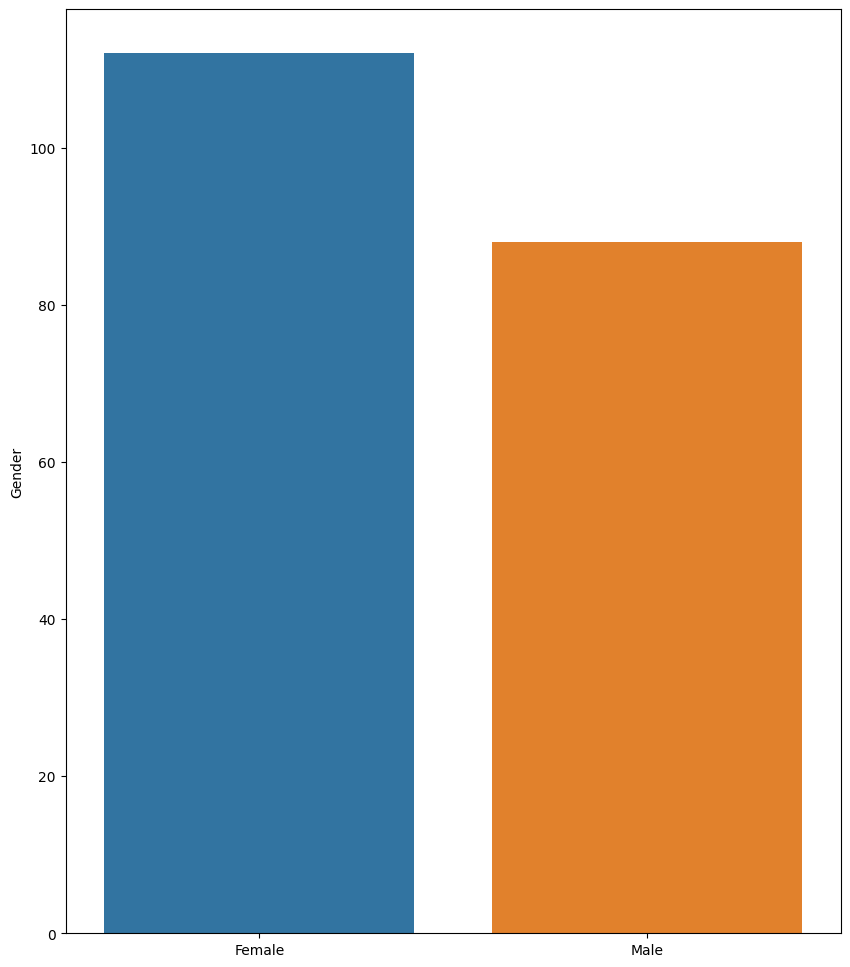

In [21]:
#BAR PLOT
plt.figure(figsize=(10,12))
sns.barplot(x=df['Gender'].value_counts().index,y=df['Gender'].value_counts())
plt.show()

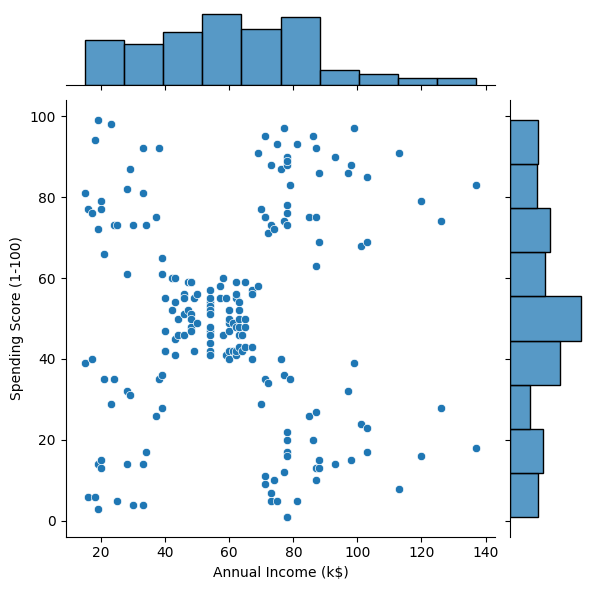

In [22]:
#BIVARIATE
#JOINT PLOT
sns.jointplot(x="Annual Income (k$)",y="Spending Score (1-100)",data=df)
plt.show()

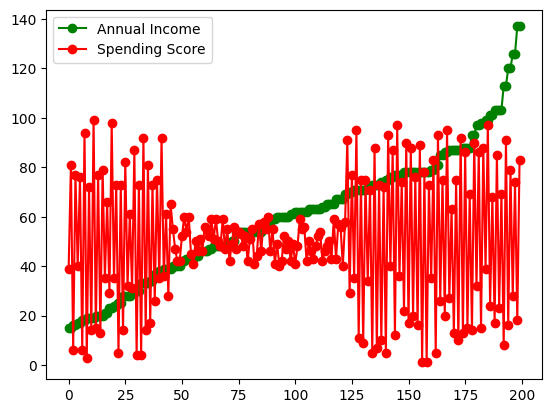

In [23]:
#LINE PLOT
line1=df['Annual Income (k$)']
line2=df['Spending Score (1-100)']
plt.plot(line1,'o-g')
plt.plot(line2,'o-r')
plt.legend(['Annual Income','Spending Score'])
plt.show()

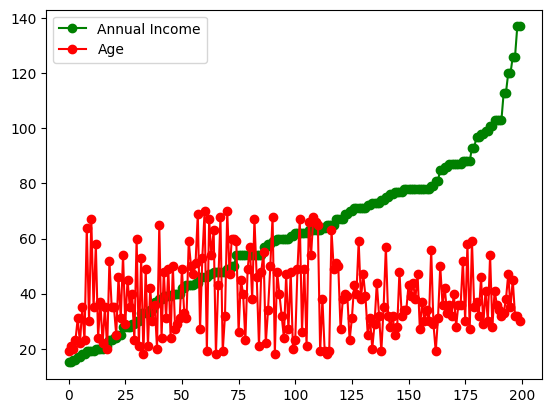

In [24]:
line1=df['Annual Income (k$)']
line2=df['Age']
plt.plot(line1,'o-g')
plt.plot(line2,'o-r')
plt.legend(['Annual Income','Age'])
plt.show()

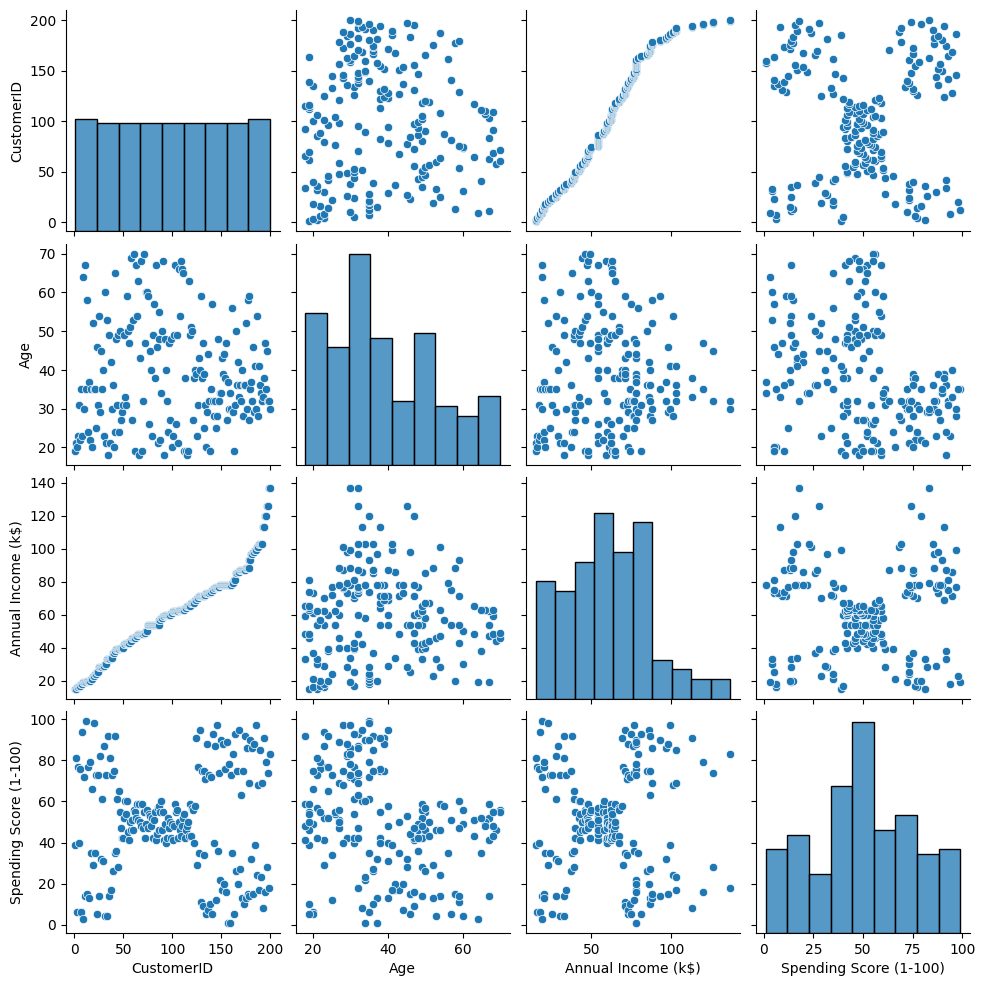

In [25]:
#MULTIVARIATE
#PAIR PLOT
sns.pairplot(df)
plt.show()

<ipython-input-26-f67628498075>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


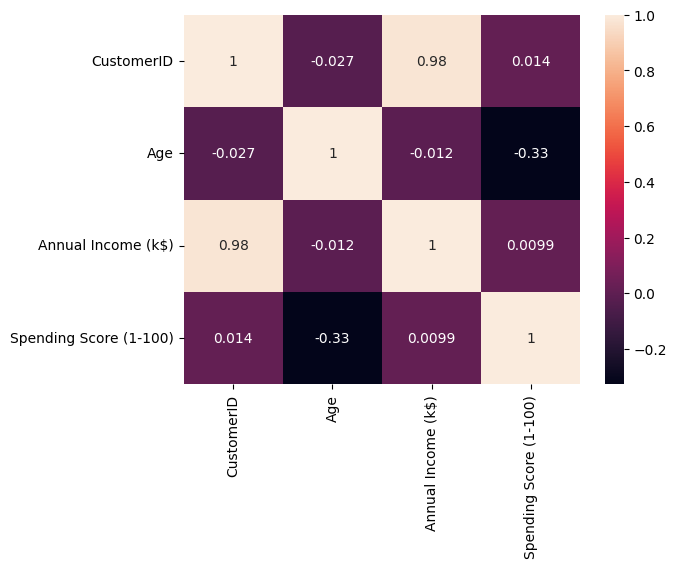

In [26]:
#HEAT MAP
sns.heatmap(df.corr(),annot=True)
plt.show()

LABEL ENCODING

In [27]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

df['Gender']=le.fit_transform(df['Gender'])
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


DROP COLUMNS

In [28]:
df.drop(columns=['CustomerID'],inplace=True)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


OUTLIERS

<Axes: >

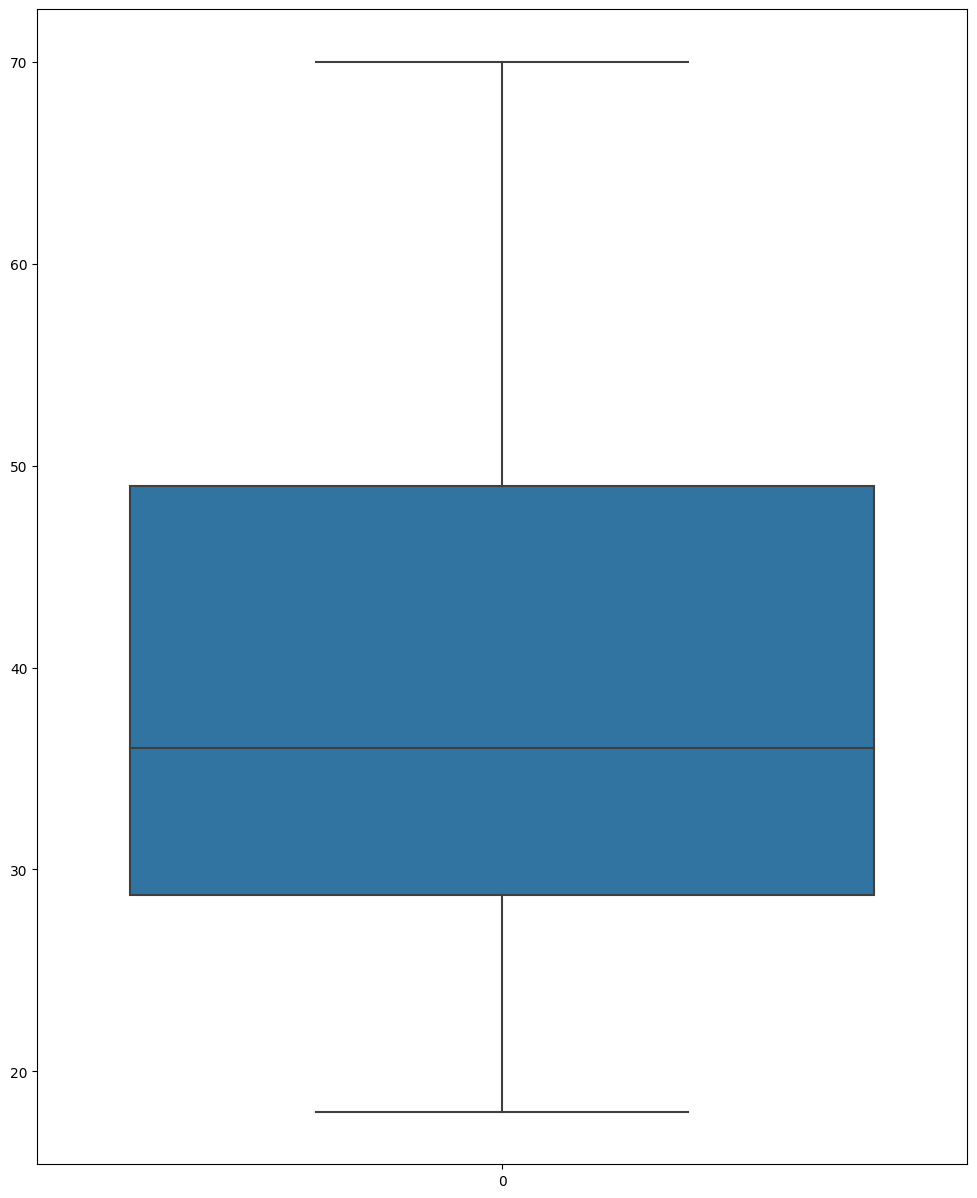

In [29]:
plt.figure(figsize=(12,15))
sns.boxplot(df['Age'])

<Axes: >

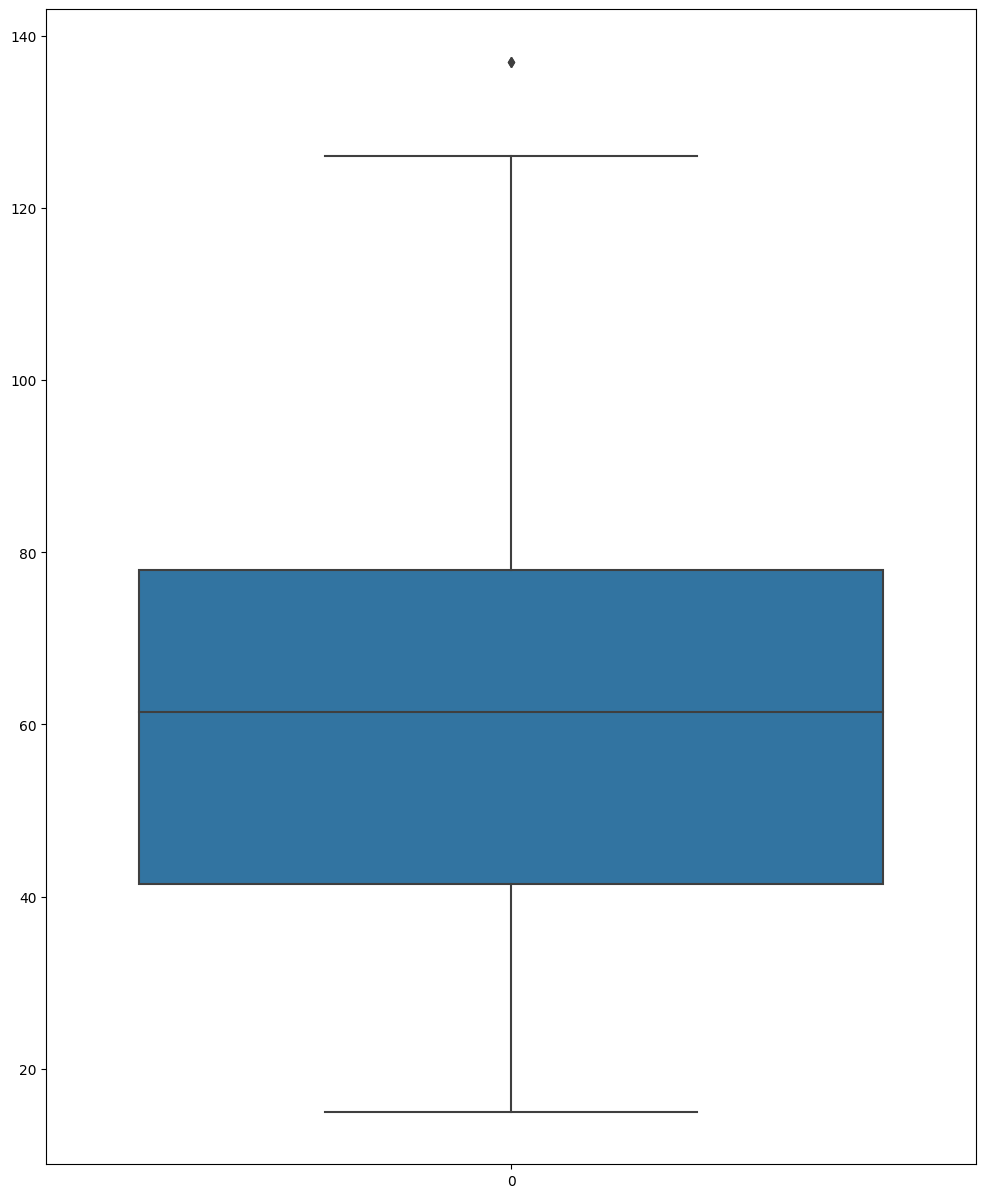

In [30]:
plt.figure(figsize=(12,15))
sns.boxplot(df['Annual Income (k$)'])

In [31]:
q1=df['Annual Income (k$)'].quantile(0.25)
q3=df['Annual Income (k$)'].quantile(0.75)
IQR = q3-q1
upper_limit = q3 + 1.5*IQR
lower_limit = q1 - 1.5*IQR
df['Annual Income (k$)'] = np.where((df['Annual Income (k$)']>upper_limit) | (df['Annual Income (k$)']<lower_limit),df['Annual Income (k$)'].median(),df['Annual Income (k$)'])

<Axes: >

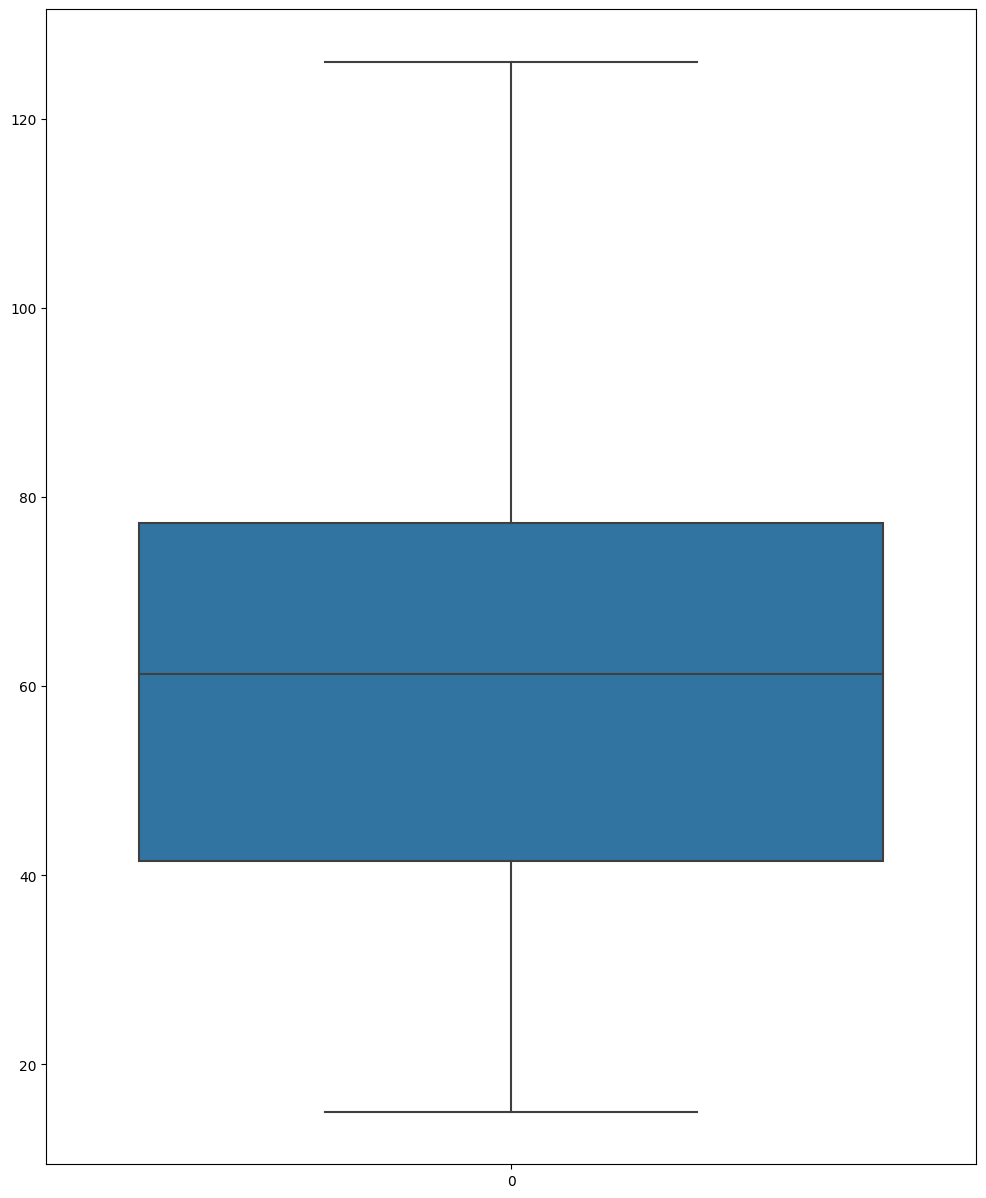

In [32]:
plt.figure(figsize=(12,15))
sns.boxplot(df['Annual Income (k$)'])

<Axes: >

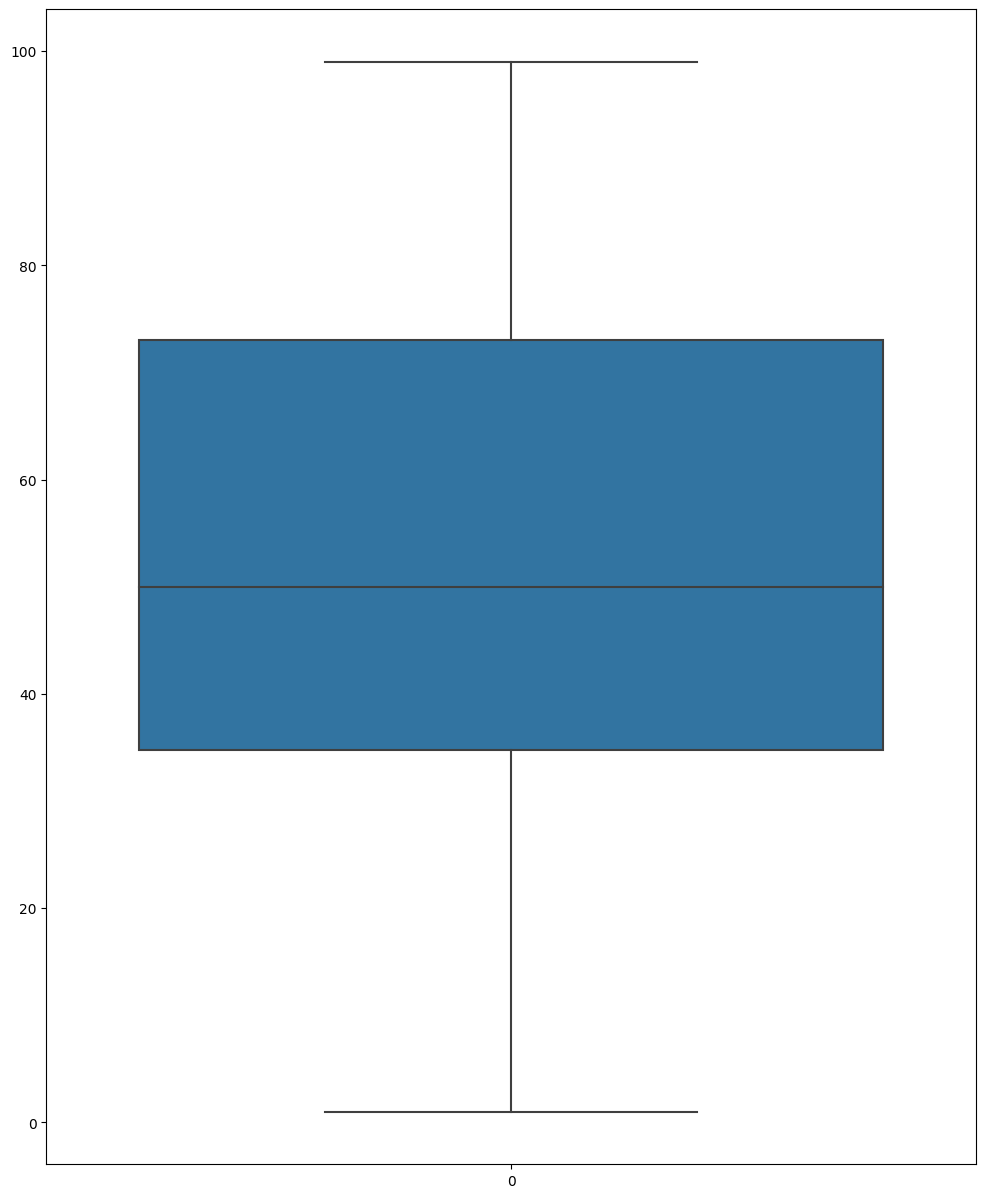

In [33]:
plt.figure(figsize=(12,15))
sns.boxplot(df['Spending Score (1-100)'])

K MEANS++ MODEL BUILDING

In [34]:
from sklearn import cluster

In [35]:
error=[]
for i in range(1,11):
  kmeans=cluster.KMeans(n_clusters=i,init='k-means++',random_state=0)
  kmeans.fit(df)
  error.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [36]:
error

[297063.67500000005,
 201152.1081841432,
 139326.23321730684,
 100349.31619915173,
 71452.15398255127,
 54455.93879921248,
 48690.46594333272,
 44049.34418034487,
 39872.05312036622,
 35841.183878126976]

Text(0, 0.5, 'error')

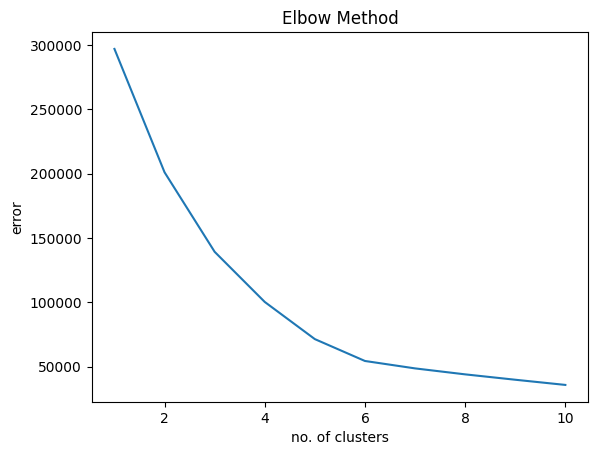

In [37]:
plt.plot(range(1,11),error)
plt.title('Elbow Method')
plt.xlabel('no. of clusters')
plt.ylabel('error')

In [38]:
km_model = cluster.KMeans(n_clusters=5, init = 'k-means++', random_state=0)

In [39]:
km_model.fit(df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=0)

In [42]:
pred = km_model.predict(df)
pred

array([4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 2,
       4, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 3, 1, 2, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 2, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

VISUALIZE CLUSTERS

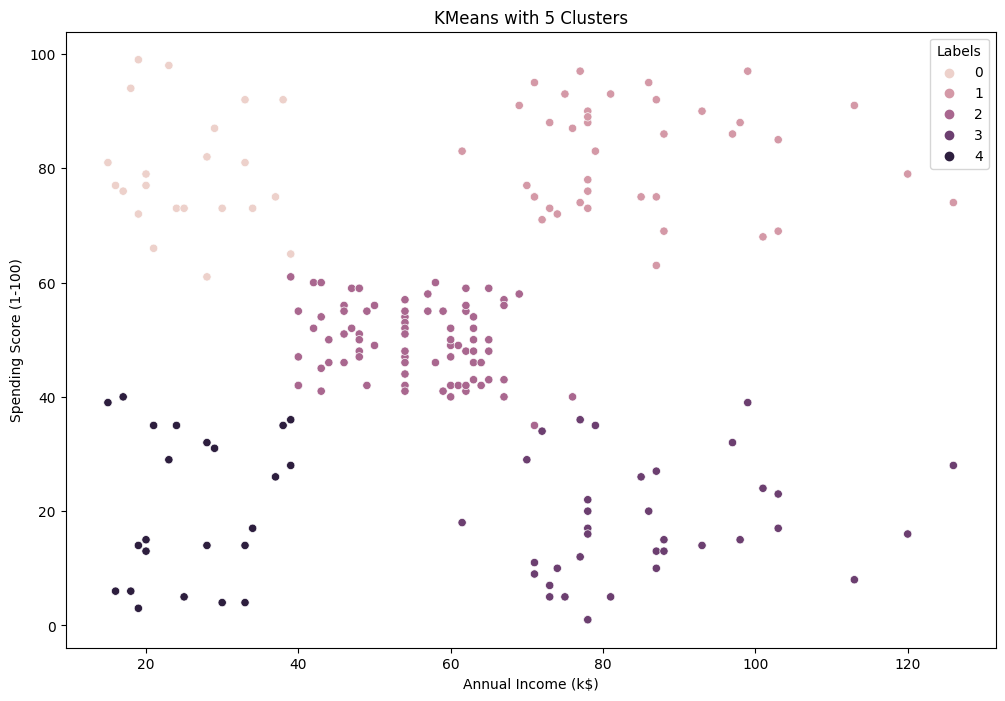

In [45]:
df['Labels'] = km_model.labels_
plt.figure(figsize=(12, 8))

sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Labels', data=df)

plt.title('KMeans with 5 Clusters')
plt.show()

TESTING RANDOM VALUES

In [46]:
km_model.predict([[0,20,85,91]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([1], dtype=int32)

In [48]:
km_model.predict([[1,58,45,30]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([4], dtype=int32)

EVALUATION

In [49]:
from sklearn.metrics import silhouette_score

In [50]:
silhouette_score(df, km_model.labels_, metric='euclidean')

0.4463101768128337